# Biodiversity starter (Codecademy)

## Load the packages and data

Project Scoping:
    
    1. Data: we will start by looking at our data, what is the information that we have? .info() .head() .shape   
    .describe(), what are the variables? which ones are we going to use? how may NaNs?
    merge our databases
    
    2. introductory EDA, visualization
    
    3. Analysis
    
    4. Conclusions

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [4]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
obs.info()
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
species.isnull().sum() #conservation status has a lot of Nans

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

## Explore and explain data
### distribution of conservation_status for animals
### Are certain types of species more likely to be endangered?
### Are the differences between species and their conservation status significant?
### Which species were spotted the most at each park?

Text(3005.7579365079364, 0.5, 'Number of Species')

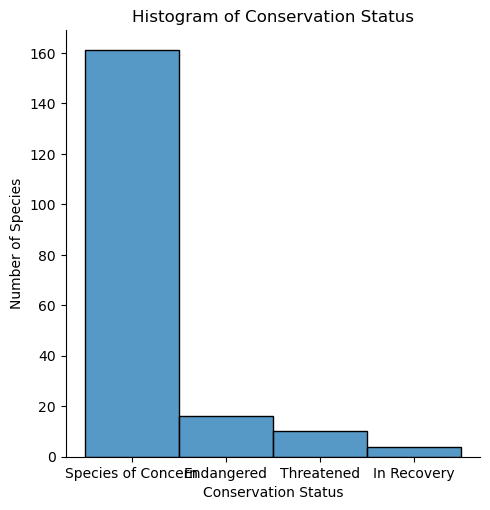

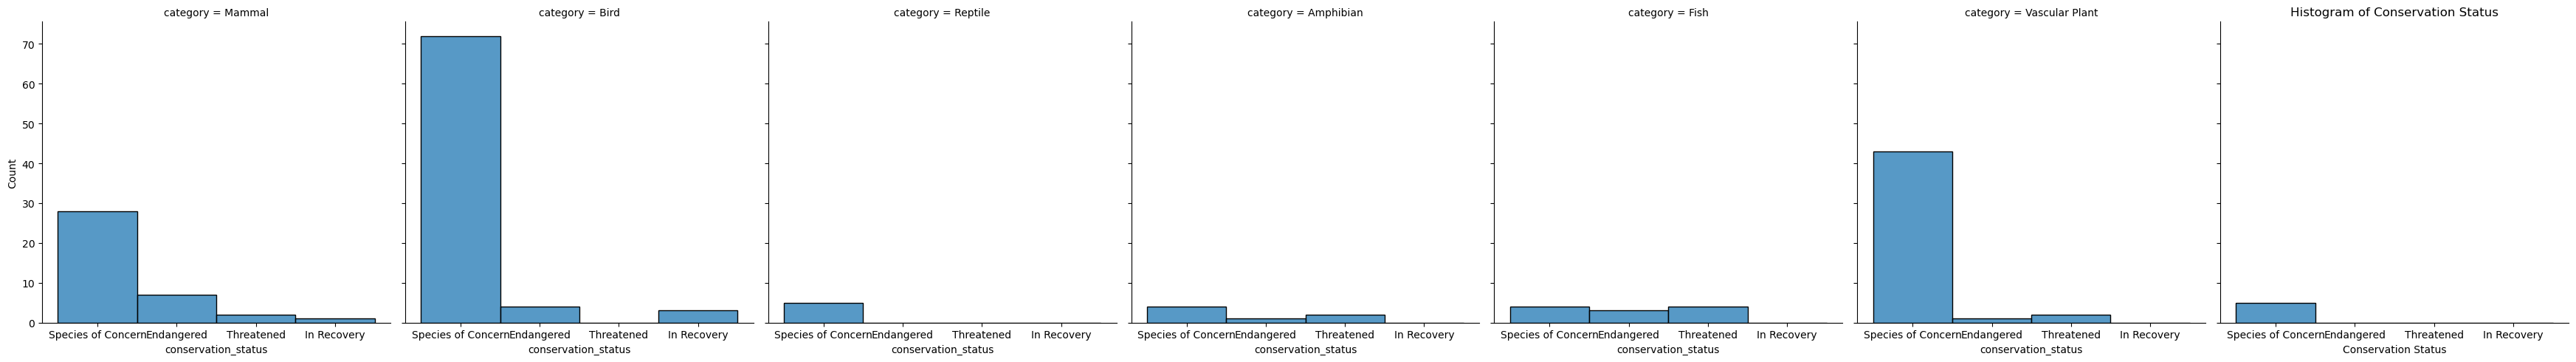

In [3]:
#distribution of conservation status from species
#for animals we can use the category var or the scientific_name var

#plt.hist(species['conservation_status'])
sns.displot(data=species, x='conservation_status')
plt.title('Histogram of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.clf

sns.displot(data=species, x='conservation_status', col='category')
plt.title('Histogram of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')

In [5]:
sns.displot(data=species, x='conservation_status', col='category')

In [17]:
conservation_counts = species.groupby('conservation_status').scientific_name.nunique().reset_index()

print(conservation_counts)

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2  Species of Concern              151
3          Threatened               10


<Figure size 640x480 with 0 Axes>

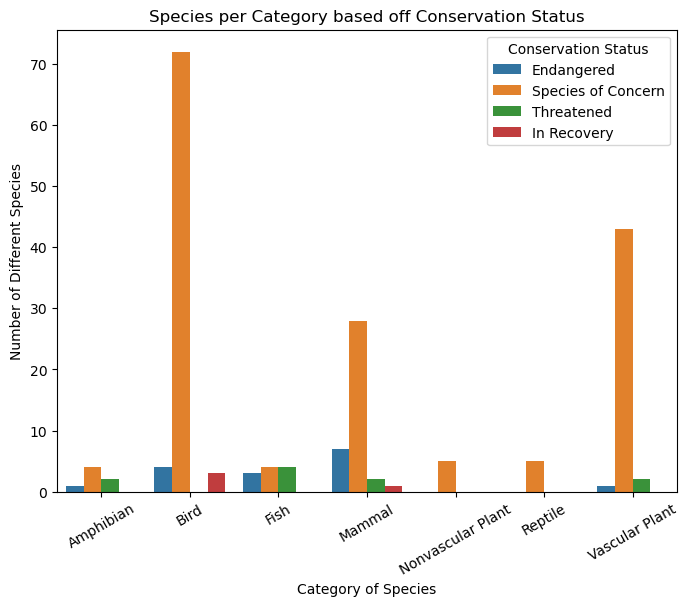

In [15]:
category_status_species = species.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=category_status_species, x='category', y='scientific_name', hue='conservation_status')
ax = plt.subplot()
ax.set_xticks(range(len(category_status_species.category.unique())))
ax.set_xticklabels(category_status_species.category.unique(), rotation=30)
plt.title('Species per Category based off Conservation Status')
plt.ylabel('Number of Different Species')
plt.xlabel('Category of Species')
plt.legend(title='Conservation Status', loc='upper right')
plt.show()
plt.clf()
plt.savefig("Number_of_Species_per_category.jpg", bbox_inches='tight')

The species that have a conservation status are 191, which is a small percentageof all the species.

all categories of living beings have species of concern, the category with most concern is "birds", the categories with most threatened species are amphibien, fish and vascular plant.on the other hand, mammals present the most endangered species.
the differences between categories of species seems significant depending on the category, but let's remember that we dont have many data on conservation status, so its hard to make hipothesis with few data.

to all the NaNs in conservation statuswe will fill with .fillna, then we will do the distributions again

In [6]:
species.fillna('No Intervention', inplace = True)

Text(-3.9305555555555554, 0.5, 'Number of Species')

<Figure size 1000x500 with 0 Axes>

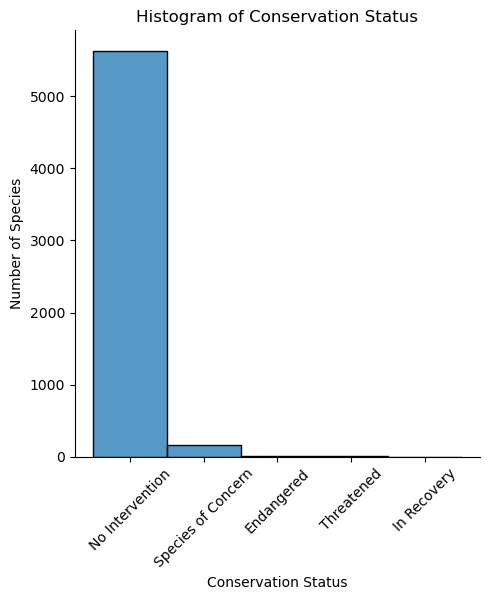

In [7]:
fig = plt.figure(figsize=(10, 5)) 
sns.displot(data=species, x='conservation_status')
plt.title('Histogram of Conservation Status')
plt.xlabel('Conservation Status')
plt.xticks(rotation=45) 
plt.ylabel('Number of Species')


In [7]:
sns.displot(data=species, x='conservation_status', col='category')

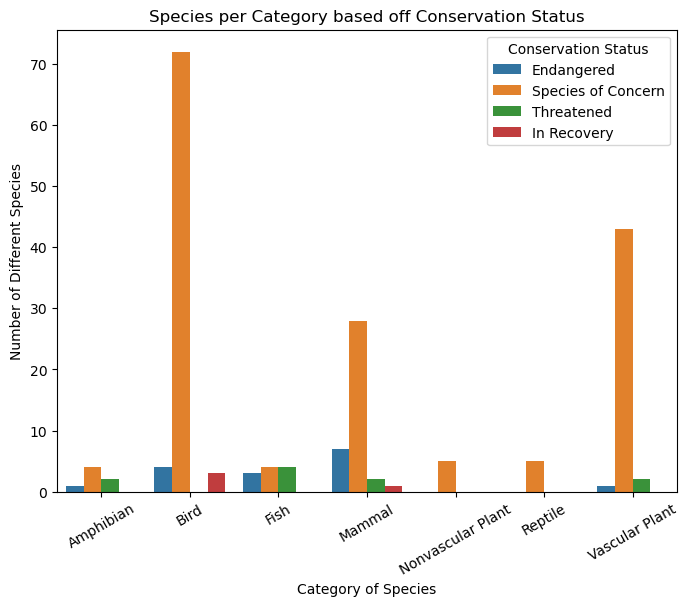

<Figure size 640x480 with 0 Axes>

In [5]:
category_status_species = species.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=category_status_species, x='category', y='scientific_name', hue='conservation_status')
ax = plt.subplot()
ax.set_xticks(range(len(category_status_species.category.unique())))
ax.set_xticklabels(category_status_species.category.unique(), rotation=30)
plt.title('Species per Category based off Conservation Status')
plt.ylabel('Number of Different Species')
plt.xlabel('Category of Species')
plt.legend(title='Conservation Status', loc='upper right')
plt.show()
plt.clf()

In [32]:
species_count = species.scientific_name.nunique()
print(species_count)

#count species by park
obspark = obs.groupby(['park_name']).nunique()
print(obspark)

5541
                                     scientific_name  observations
park_name                                                         
Bryce National Park                             5541           142
Great Smoky Mountains National Park             5541           129
Yellowstone National Park                       5541           149
Yosemite National Park                          5541           151


In [56]:
obs_park = obs.groupby('park_name').observations.nunique().reset_index()
print(obs_park)
obs_park.sort_values('observations')
#obs_park=obs_park.sort_values('observations')

                             park_name  observations
0                  Bryce National Park           142
1  Great Smoky Mountains National Park           129
2            Yellowstone National Park           149
3               Yosemite National Park           151


,park_name,observations
1,Great Smoky Mountains National Park,129
0,Bryce National Park,142
2,Yellowstone National Park,149
3,Yosemite National Park,151


In [54]:
#barplot, but it seems unnecessary with the table

#plt.figure(figsize = (16, 4))
#ax = plt.subplot()
#plt.bar(range(len(obs_park)), obs_park.observations.values)
#ax.set_xticks(range(len(obs_park)))
#ax.set_xticklabels(obs_park.park_name.values)
#plt.ylabel('Number of Observations')
#plt.title('Observations of different Species')
#plt.show()

All national parks have more than 125 species. the park with the most species (observed) is Yosemite Park with 151 different species, followed by Yellowstone Park, then Bryce Park and last Great Smoky Mountains Park

## Conclusions
What did you learn throughout the process?

Are the results what you expected?

What are the key findings and takeaways?


You can clearly see some major differences between the categories of species!

If you were to rank the categories from greatest to least by how much attention each category needs, then the ranking would be as follows:

1. Bird (Huge concern for nearly the entire category of species)
2. Vascular Plant (Huge concern for nearly the entire category of species)
3. Mammal (Has the most endangered species but far less species who are of concern)
4. Fish (Moderate concern)
5. Amphibian (Moderate concern)
6. Nonvascular Plant & Reptile (No Reptiles or Nonvascular Plants are endangered and very few are of concern)